In [1]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from util import*
from tensorflow.keras import layers, Model


In [2]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [5]:
# Specify the path to download data
download_path = os.getcwd() + "/dataset/"
print(download_path)

/home/zhenglyu/Desktop/git/cme-216-housing-pricing-prediction/dataset/


In [6]:
ds = download_skl_dataset(download_path)

In [7]:
data, target, feature_names, DESCR = data_process(ds)

In [8]:
data_norm, std_data, mean_data = feature_normalization(data, log_flag=False)

In [9]:
# Split data to training, validation and testset
x_train, y_train, x_val, y_val, x_test, y_test = train_set_prepare(data_norm, target, random_state=100)

In [10]:
# Create the model class
model = nn_model(data, target)

# Build model
# neuron_list = [256, 256, 128, 128, 64, 32, 16, 8, 4]
neuron_list = [128, 128, 128, 64, 32, 16, 8, 4]
model.build_model(neuron_list, reg_factor=1e-6)

# Compile model
model.compile_model(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3))

In [11]:
# Specify the checkpoint path
cur_path = os.getcwd()
ckpt_path = cur_path + '/checkpoint/network_mse.ckpt'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=ckpt_path,
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

In [13]:
# Training only. SKIP THIS WHEN LOADING MODEL
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Train the model
model.train(x_train, y_train, x_val, y_val, batch_size=10, epochs=30, callbacks=[lr_scheduler, model_checkpoint_callback])

Epoch 1/30
1652/1652 [==============================] - 5s 3ms/step - loss: 0.7856 - mse: 0.7849 - val_loss: 0.4700 - val_mse: 0.4688 - lr: 0.0010
Epoch 2/30
1652/1652 [==============================] - 5s 3ms/step - loss: 0.4068 - mse: 0.4058 - val_loss: 0.3937 - val_mse: 0.3926 - lr: 0.0010
Epoch 3/30
1652/1652 [==============================] - 5s 3ms/step - loss: 0.3564 - mse: 0.3554 - val_loss: 0.3186 - val_mse: 0.3174 - lr: 0.0010
Epoch 4/30
1652/1652 [==============================] - 5s 3ms/step - loss: 0.2932 - mse: 0.2922 - val_loss: 0.2811 - val_mse: 0.2800 - lr: 1.0000e-04
Epoch 5/30
1652/1652 [==============================] - 5s 3ms/step - loss: 0.2776 - mse: 0.2765 - val_loss: 0.2858 - val_mse: 0.2846 - lr: 1.0000e-04
Epoch 6/30
1652/1652 [==============================] - 6s 4ms/step - loss: 0.2706 - mse: 0.2696 - val_loss: 0.2686 - val_mse: 0.2674 - lr: 1.0000e-04
Epoch 7/30
1652/1652 [==============================] - 5s 3ms/step - loss: 0.2655 - mse: 0.2641 - val_los

In [12]:
# Load model
model.load(ckpt_path)

In [13]:
y_pred = model.test(x_test, y_test)

In [14]:
mse = np.mean(((y_pred.T - y_test)**2))
print(mse)

0.2423174126950616


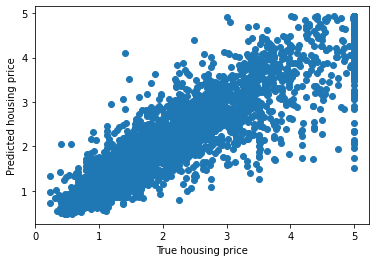

In [15]:
plot_pred_true(x_test, y_test, y_pred)

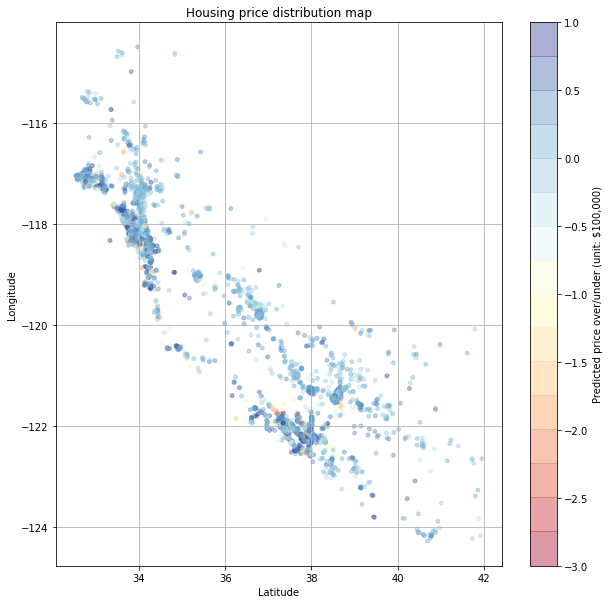

In [16]:
# Plot land map
save_path = cur_path + '/figures/network_norm_data_train_mse_test_mse.png'
land_map(x_test*std_data + mean_data, (y_pred.T - y_test), save_path=save_path, bar_label='Predicted price over/under (unit: $100,000)', clim=[-3, 1], step=16)